In [1]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

sns.set(style="white")

In [2]:
# Generate a large random dataset
# This is where you need to import the loanz.csv file and set it to df
# everything should be set to df after that
# Then plug in some variables to see the distoplots
# Use the correlation matrix to find relationships to explore in the data

In [3]:
# Drop the 'rs' variable, it won't be needed with the .csv file
# set df = pd.read_csv('.../.../loanz.csv')

rs = np.random.RandomState(33)
df = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

In [4]:
# Shape of dataframe

df.shape

(100, 26)

In [5]:
# Summary Statistics of entire DataFrame

df.describe()

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.081596,0.078023,0.044878,-0.040786,0.016736,-0.167432,0.127455,0.138209,-0.048846,-0.004043,...,0.019896,-0.023116,0.019742,-0.011633,-0.147412,0.020601,0.125028,-0.005854,0.071897,-0.051565
std,1.018467,1.054956,0.989424,0.905781,1.032321,0.954503,0.991769,0.978189,1.030390,0.949904,...,0.949106,0.930974,0.954689,0.977978,1.074540,1.018197,1.010810,0.976885,0.936936,0.970688
min,-2.337641,-2.452230,-2.472118,-2.394488,-2.925341,-3.256337,-3.166922,-2.112389,-2.466234,-2.626004,...,-1.913151,-2.403428,-2.358469,-2.021463,-2.572637,-2.151376,-2.136971,-2.202014,-1.735491,-2.030960
25%,-0.893057,-0.721087,-0.543579,-0.649498,-0.623068,-0.758134,-0.237779,-0.693132,-0.836440,-0.673303,...,-0.621729,-0.614837,-0.512861,-0.629324,-0.965324,-0.746130,-0.450370,-0.729523,-0.548836,-0.703613
50%,-0.136205,0.070466,0.178399,-0.020283,0.096275,-0.104368,0.126517,0.138102,-0.014474,-0.084552,...,-0.034098,0.045424,0.031455,-0.086551,-0.137972,0.221700,0.203398,0.148134,-0.048375,-0.100009
75%,0.652472,0.737989,0.796469,0.663910,0.638834,0.501665,0.609232,0.741766,0.652562,0.740517,...,0.578771,0.576560,0.549695,0.480861,0.542014,0.741436,0.616496,0.665580,0.702514,0.490003
max,2.257337,2.632390,2.618566,2.040243,2.448736,1.781612,2.763931,2.887298,2.353097,2.458884,...,2.775535,2.209934,3.736254,2.452405,2.821279,2.392585,2.833278,1.937571,2.631628,2.876828


In [13]:
# Creates a dataframe of counts for missing values in df

dfMissing = df[df.columns[df.isnull().sum() > 0].tolist()].info()

dfMissing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Empty DataFrame

In [8]:
# Summary Statistics for a single column in DataFrame

df['A'].describe()

count    100.000000
mean      -0.081596
std        1.018467
min       -2.337641
25%       -0.893057
50%       -0.136205
75%        0.652472
max        2.257337
Name: A, dtype: float64

In [9]:
# Types of data in DataFrame

print(df.dtypes)

A    float64
B    float64
C    float64
D    float64
E    float64
F    float64
G    float64
H    float64
I    float64
J    float64
K    float64
L    float64
M    float64
N    float64
O    float64
P    float64
Q    float64
R    float64
S    float64
T    float64
U    float64
V    float64
W    float64
X    float64
Y    float64
Z    float64
dtype: object


In [10]:
# Types of data for a single column in DataFrame

print(df['A'].dtypes)

float64


In [11]:
df.sample(frac=.2)

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
59,-0.351033,2.087338,1.271353,-1.613561,-1.272922,0.619864,0.154984,-0.752995,-1.465034,1.661359,...,-0.265142,0.229248,-0.401913,0.958522,-1.779779,0.549052,2.833278,0.167467,-0.290152,-0.143101
85,-1.204888,0.379360,0.279093,-0.272061,0.938810,1.014692,-0.884077,-0.798472,-0.170225,0.911054,...,-1.913151,-1.550654,-0.312834,1.843585,0.196603,0.692840,-0.821877,-2.202014,1.247729,-0.993530
84,1.723232,-1.448793,1.043503,0.264840,0.359078,-2.445161,-0.010815,-0.014872,-2.021980,-0.521089,...,0.573591,-1.002157,0.169899,2.452405,-0.960078,-0.167911,0.450085,0.174857,-1.735491,-0.128420
57,-0.183940,-0.544541,0.478824,1.759047,0.588564,-0.043467,0.157188,1.599694,-0.201163,0.333026,...,-0.922167,-0.160428,-0.585272,1.278350,-0.166970,-0.545537,0.471139,-0.389628,-0.269352,0.095832
38,-0.176920,0.633757,-0.349690,-0.993255,0.513892,-0.545403,-0.146365,1.089684,0.458521,-0.321401,...,0.886771,-0.425938,0.177814,-0.129092,0.729298,-0.718509,0.616482,-1.151441,1.690079,-0.037860
91,0.601327,1.029243,0.692358,-0.534746,-0.476082,0.052636,-0.149405,0.201912,-0.566314,1.595645,...,0.437284,-0.435781,0.392435,-0.820645,-1.210204,2.392585,1.247948,0.916213,-0.681749,-0.019906
16,0.603962,-1.043376,-1.188922,0.017658,-0.554258,-0.343280,0.091621,0.047419,0.643932,-0.829498,...,-0.413684,-1.633088,-0.342140,-0.120327,-1.146664,0.102151,0.351734,-1.245365,-0.438549,-0.586680
48,0.510637,0.174026,0.130110,-1.638763,0.236682,-0.016213,1.682649,-0.355321,0.644062,0.363280,...,0.955739,-1.208644,-0.308637,1.544026,1.659756,1.138229,0.579256,-1.435264,0.256429,-0.103125
23,0.289726,-0.267706,0.606679,-0.033347,-1.002385,-0.817093,0.749901,-0.952216,-0.273340,-1.026944,...,0.689970,-2.206293,0.950822,0.075901,1.014808,-1.729528,-0.124868,-1.749360,-0.341173,-0.583565
32,-0.154071,0.733067,-1.002699,0.630681,0.041917,-0.433963,0.383511,1.640165,-0.161338,-0.162582,...,-0.497777,-0.697212,0.271764,-0.441024,0.820618,0.418893,-0.104318,0.242003,-0.168541,-1.230905


In [16]:
# Kurtosis and Skewness are great measures when exploring
# Replace A with an actual variable from loanz
# Add this to the bottom of your graph so you know what it is looking at

# print( 'excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(df['A']) ))
# print( 'skewness of normal distribution (should be 0): {}'.format( skew(df['A']) ))

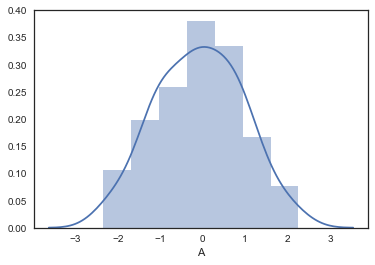

excess kurtosis of normal distribution (should be 0): -0.5299611385016081
skewness of normal distribution (should be 0): -0.01392814456865913


In [17]:
# Replace A with an actual variable from loanz

ax = sns.distplot(df['A'])

plt.show(ax)

print( 'excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(df['A']) ))
print( 'skewness of normal distribution (should be 0): {}'.format( skew(df['A']) ))

In [18]:
# Box Plots

#ax = sns.boxplot(df.A, color = 'orange', orient = 'v')

#plt.show(ax)

In [19]:
# Violin Plots

#ax = sns.violinplot(df['C'], color = 'cyan')

#plt.show(ax)

In [20]:
# Compute the correlation matrix
corr = df.corr()

In [21]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

In [22]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

In [23]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

In [24]:
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

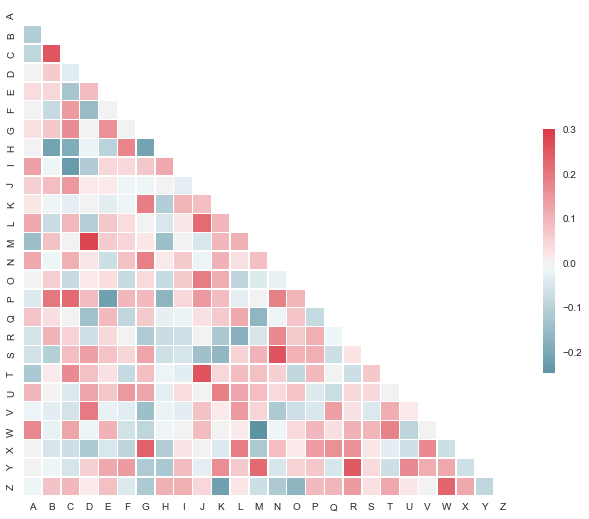

In [25]:
plt.show(ax)

In [22]:
## Compute the Covariance Matrix
## Not really necessary since we are looking at Correlation
## Correlation is a scaled version of covariance
## delete the single # lines to get it working

#print(np.cov(df))

#cova = np.cov(df)

## Generate a mask for the upper triangle
#mask = np.zeros_like(cova, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

## Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(11, 9))

## Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)

## Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(cova, mask=mask, cmap=cmap, vmax=.3, center=0,
#            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Covariance matrix.... What... What have I done?...

#plt.show(ax)

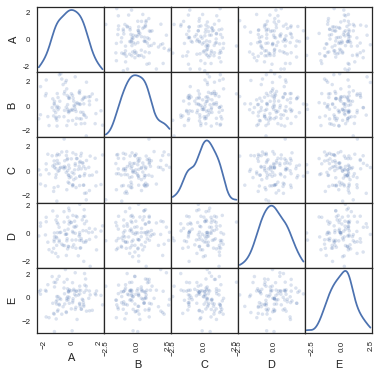

In [23]:
# Matrix Scatterplot for A through G
from pandas.plotting import scatter_matrix

scatter_matrix(df[['A', 'B', 'C', 'D', 'E']], alpha=0.2, figsize=(6,6), diagonal='kde')

plt.show()

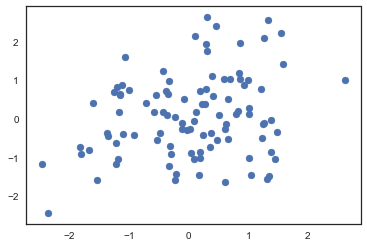

In [24]:
# After looking at the correlation matrix
# Let's scatter plot some correlated variables
# Replace C and B with some actual variables from loanz

x = df['C']
y = df['B']

plt.scatter(x, y)

plt.show()

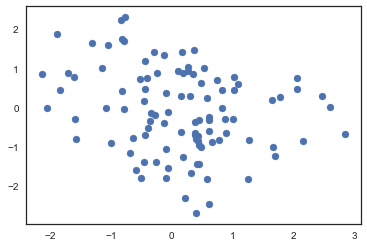

In [25]:
x = df['W']
y = df['M']

plt.scatter(x, y)

plt.show()

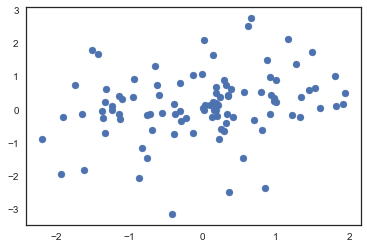

In [26]:
x = df['X']
y = df['G']

plt.scatter(x, y)

plt.show()